<a href="https://colab.research.google.com/github/jaiVIT123/DSAssignment/blob/main/DSAssignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

import pickle

In [ ]:
df = pd.read_csv('/content/2year.csv', na_values = '?')

In [ ]:
df.shape

(10173, 65)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10173 entries, 0 to 10172
Data columns (total 65 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Attr1   10172 non-null  float64
 1   Attr2   10172 non-null  float64
 2   Attr3   10172 non-null  float64
 3   Attr4   10151 non-null  float64
 4   Attr5   10149 non-null  float64
 5   Attr6   10172 non-null  float64
 6   Attr7   10172 non-null  float64
 7   Attr8   10155 non-null  float64
 8   Attr9   10169 non-null  float64
 9   Attr10  10172 non-null  float64
 10  Attr11  10172 non-null  float64
 11  Attr12  10151 non-null  float64
 12  Attr13  10110 non-null  float64
 13  Attr14  10172 non-null  float64
 14  Attr15  10161 non-null  float64
 15  Attr16  10154 non-null  float64
 16  Attr17  10155 non-null  float64
 17  Attr18  10172 non-null  float64
 18  Attr19  10109 non-null  float64
 19  Attr20  10110 non-null  float64
 20  Attr21  7009 non-null   float64
 21  Attr22  10172 non-null  float64
 22

#**DATA PREPARATION AND VISUALISATION**

In [ ]:
columns_to_be_dropped = [
    col for col in df.columns if df[col].isnull().sum() >= (0.2 * df.shape[0])
]

print(f"Drop the following columns: {columns_to_be_dropped}")

Drop the following columns: ['Attr21', 'Attr37']


In [ ]:
df = df.drop(
    columns = columns_to_be_dropped,
    axis = 1
)

df.head()

,Attr1,Attr2,Attr3,Attr4,Attr5,Attr6,Attr7,Attr8,Attr9,Attr10,...,Attr56,Attr57,Attr58,Attr59,Attr60,Attr61,Attr62,Attr63,Attr64,class
0,0.202350,0.46500,0.240380,1.5171,-14.547,0.510690,0.25366,0.91816,1.15190,0.42695,...,0.13184,0.473950,0.86816,0.00024,8.5487,5.16550,107.740,3.38790,5.3440,0
1,0.030073,0.59563,0.186680,1.3382,-37.859,-0.000319,0.04167,0.67890,0.32356,0.40437,...,0.12146,0.074369,0.87235,0.00000,1.5264,0.63305,622.660,0.58619,1.2381,0
2,0.257860,0.29949,0.665190,3.2211,71.799,0.000000,0.31877,2.33200,1.67620,0.69841,...,0.16499,0.369210,0.81614,0.00000,4.3325,3.19850,65.215,5.59690,47.4660,0
3,0.227160,0.67850,0.042784,1.0828,-88.212,0.000000,0.28505,0.47384,1.32410,0.32150,...,0.29358,0.706570,0.78617,0.48456,5.2309,5.06750,142.460,2.56210,3.0066,0
4,0.085443,0.38039,0.359230,1.9444,21.731,0.187900,0.10823,1.37140,1.11260,0.52167,...,0.10124,0.163790,0.89876,0.00000,5.7035,4.00200,89.058,4.09840,5.9874,0


In [ ]:
df.shape

(10173, 63)

In [ ]:
print(list(df.isnull().sum()))

[1, 1, 1, 22, 24, 1, 1, 18, 4, 1, 1, 22, 63, 1, 12, 19, 18, 1, 64, 63, 1, 63, 225, 1, 19, 706, 212, 1, 63, 63, 87, 22, 18, 1, 1, 1, 63, 22, 197, 63, 63, 63, 541, 22, 74, 2, 63, 18, 1, 74, 212, 212, 1, 63, 2, 39, 2, 543, 16, 63, 22, 212, 0]


In [ ]:
for col_name, col_data in df.items():
    if df[col_name].isnull().sum() > 0:
        # Replacing missing values with median
        df[col_name] = df[col_name].fillna(df[col_name].median())

In [ ]:
df.isnull().sum().sum()

0

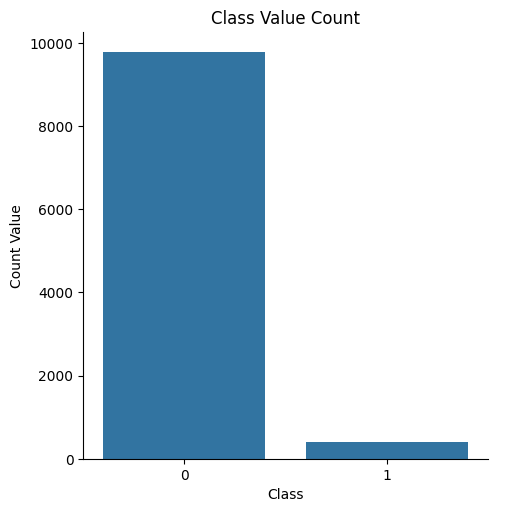

In [ ]:
sns.catplot(data = df, x = 'class', kind = 'count')

plt.xlabel('Class')
plt.ylabel('Count Value')
plt.title('Class Value Count')

plt.show()

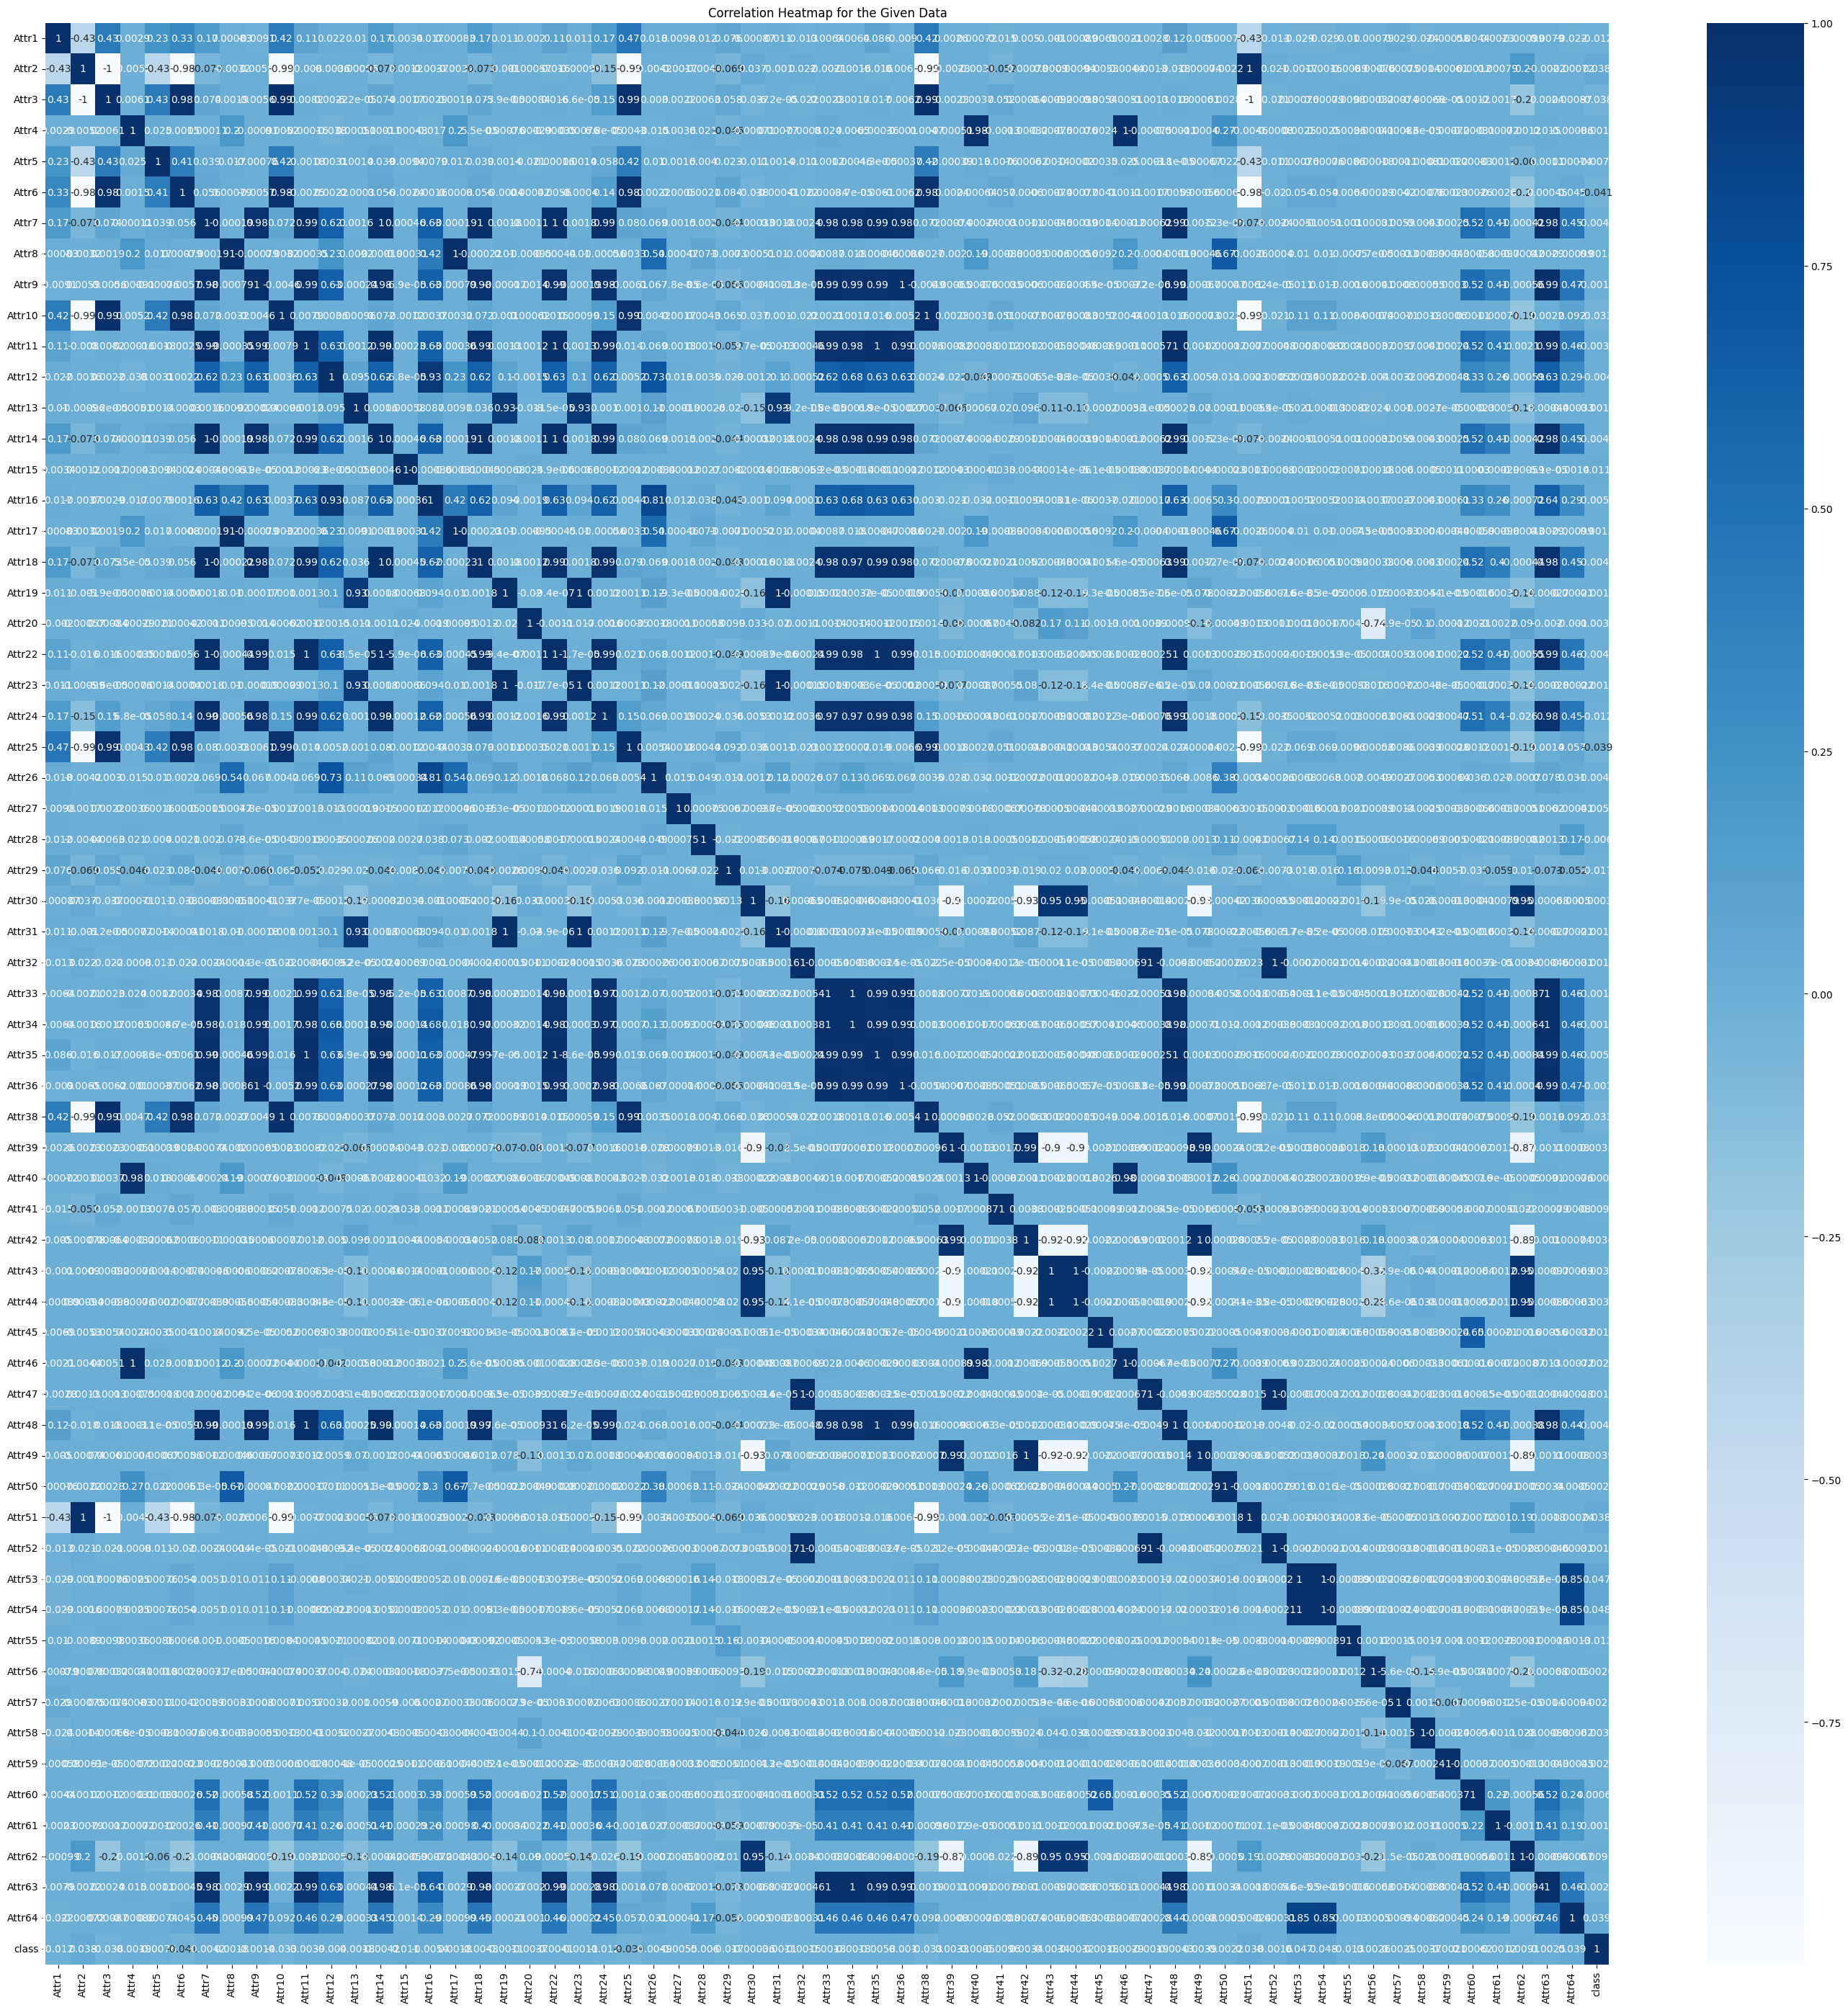

In [ ]:
plt.figure(figsize = [35, 35])

sns.heatmap(df.corr(), annot = True, cmap = 'Blues')

plt.title('Correlation Heatmap for the Given Data')
plt.show()

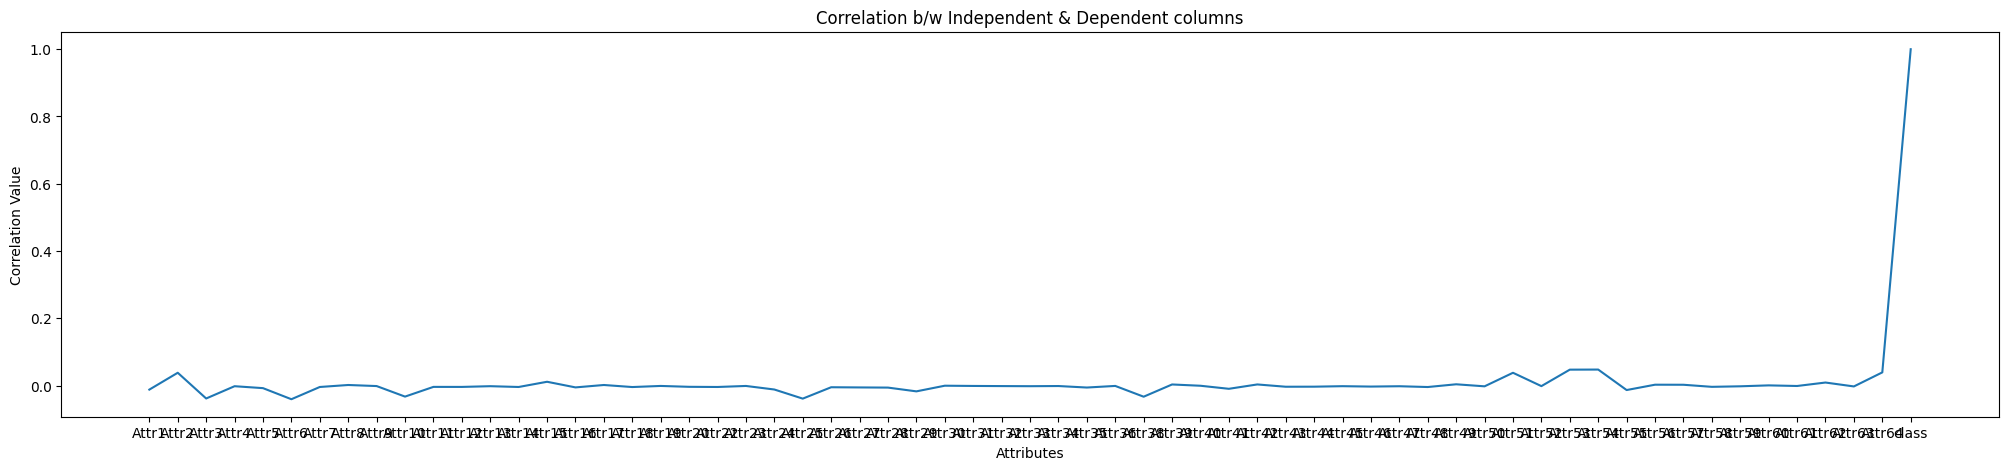

In [ ]:
plt.figure(figsize = [25, 5])

sns.lineplot(df.corr()['class'])

plt.xlabel('Attributes')
plt.ylabel('Correlation Value')
plt.title('Correlation b/w Independent & Dependent columns')
plt.show()

#**FEATURE SELECTION**

In [ ]:
# Dependent variable
y = df['class']
(y)

0        0
1        0
2        0
3        0
4        0
        ..
10168    1
10169    1
10170    1
10171    1
10172    1
Name: class, Length: 10173, dtype: int64

In [ ]:
# Independent variables
x = df.drop(columns = ['class'], axis = 1)
(x)

,Attr1,Attr2,Attr3,Attr4,Attr5,Attr6,Attr7,Attr8,Attr9,Attr10,...,Attr55,Attr56,Attr57,Attr58,Attr59,Attr60,Attr61,Attr62,Attr63,Attr64
0,0.202350,0.46500,0.240380,1.51710,-14.54700,0.510690,0.253660,0.918160,1.15190,0.426950,...,242500.0,0.131840,0.473950,0.86816,0.000240,8.5487,5.16550,107.740,3.38790,5.3440
1,0.030073,0.59563,0.186680,1.33820,-37.85900,-0.000319,0.041670,0.678900,0.32356,0.404370,...,2179.5,0.121460,0.074369,0.87235,0.000000,1.5264,0.63305,622.660,0.58619,1.2381
2,0.257860,0.29949,0.665190,3.22110,71.79900,0.000000,0.318770,2.332000,1.67620,0.698410,...,3668.6,0.164990,0.369210,0.81614,0.000000,4.3325,3.19850,65.215,5.59690,47.4660
3,0.227160,0.67850,0.042784,1.08280,-88.21200,0.000000,0.285050,0.473840,1.32410,0.321500,...,1273.8,0.293580,0.706570,0.78617,0.484560,5.2309,5.06750,142.460,2.56210,3.0066
4,0.085443,0.38039,0.359230,1.94440,21.73100,0.187900,0.108230,1.371400,1.11260,0.521670,...,18209.0,0.101240,0.163790,0.89876,0.000000,5.7035,4.00200,89.058,4.09840,5.9874
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10168,0.029970,0.66806,0.066243,1.11030,-105.55000,0.029970,0.038888,0.482740,1.02920,0.322500,...,3952.0,0.028377,0.092931,0.97162,0.209820,3.0914,3.94560,192.220,1.89880,3.4199
10169,0.012843,0.49306,-0.160620,0.61898,-24.80100,0.012843,0.012843,0.905900,1.01450,0.446660,...,-3287.2,0.014247,0.028752,0.98575,0.160090,48.6660,63.75200,40.071,9.10870,5.1956
10170,0.015092,0.55759,-0.284600,0.48599,-85.57100,0.015092,0.009826,0.694880,1.00600,0.387460,...,-28417.0,0.005971,0.038950,0.99403,0.010091,15.0530,11.96400,114.250,3.19480,2.4201
10171,-0.002554,0.47076,0.424010,1.90070,0.95483,-0.002554,0.001785,1.114400,0.99293,0.524640,...,4032.3,-0.007122,-0.004869,1.00710,0.000000,6.4289,5.70250,64.291,5.67730,25.3990


In [ ]:
# Create a feature selection object
rfe_dtc = RFE(
    estimator = DecisionTreeClassifier(),
    n_features_to_select = 10
)

# Fit the feature selection object to the data
rfe_dtc.fit(x, y)

# Create a list of all selected features
dtc_selected_features = []
for i, col in zip(range(x.shape[1]), x.columns):
    if rfe_dtc.support_[i]:
        dtc_selected_features.append(col)

# Print the selected features
print(f"Decision Tree Classifier : \n{dtc_selected_features}")

Decision Tree Classifier : 
['Attr5', 'Attr6', 'Attr9', 'Attr27', 'Attr34', 'Attr44', 'Attr46', 'Attr54', 'Attr58', 'Attr60']


In [ ]:
# Create a feature selection object
rfe_rfc = RFE(
    estimator = DecisionTreeClassifier(),
    n_features_to_select = 10
)

# Fit the feature selection object to the data
rfe_rfc.fit(x, y)

# Create a list of all selected features
rfc_selected_features = []
for i, col in zip(range(x.shape[1]), x.columns):
    if rfe_rfc.support_[i]:
        rfc_selected_features.append(col)

# Print the selected features
print(f"Random Forest Classifier : \n{rfc_selected_features}")

Random Forest Classifier : 
['Attr5', 'Attr6', 'Attr27', 'Attr34', 'Attr36', 'Attr44', 'Attr46', 'Attr54', 'Attr58', 'Attr60']


In [ ]:
# Create a feature selection object
rfe_xgb = RFE(
    estimator = DecisionTreeClassifier(),
    n_features_to_select = 10
)

# Fit the feature selection object to the data
rfe_xgb.fit(x, y)

# Create a list of all selected features
xgb_selected_features = []
for i, col in zip(range(x.shape[1]), x.columns):
    if rfe_xgb.support_[i]:
        xgb_selected_features.append(col)

# Print the selected features
print(f"XGB Classifier : \n{xgb_selected_features}")

XGB Classifier : 
['Attr5', 'Attr6', 'Attr27', 'Attr33', 'Attr34', 'Attr44', 'Attr46', 'Attr54', 'Attr58', 'Attr60']


#**TRAIN-TEST SPLIT**

In [ ]:
def train_test_splitting(x, y):
    x_train, x_test, y_train, y_test = train_test_split(
        x,
        y,
        test_size = 0.2,
        random_state = 42
    )

    return x_train, x_test, y_train, y_test

In [ ]:
dtc_x_train, dtc_x_test, dtc_y_train, dtc_y_test = train_test_splitting(
    x = x.drop(columns = [col for col in x if col not in dtc_selected_features], axis = 1),
    y = y
)

rfc_x_train, rfc_x_test, rfc_y_train, rfc_y_test = train_test_splitting(
    x = x.drop(columns = [col for col in x if col not in rfc_selected_features], axis = 1),
    y = y
)

xgb_x_train, xgb_x_test, xgb_y_train, xgb_y_test = train_test_splitting(
    x = x.drop(columns = [col for col in x if col not in xgb_selected_features], axis = 1),
    y = y
)

In [ ]:
def balance_data(x_train, y_train):
    smote = SMOTE()
    x_train_smote, y_train_smote = smote.fit_resample(x_train, y_train)
    return x_train_smote, y_train_smote

In [ ]:
dtc_x_train_smote, dtc_y_train_smote = balance_data(
    x_train = dtc_x_train,
    y_train = dtc_y_train
)

rfc_x_train_smote, rfc_y_train_smote = balance_data(
    x_train = rfc_x_train,
    y_train = rfc_y_train
)

xgb_x_train_smote, xgb_y_train_smote = balance_data(
    x_train = xgb_x_train,
    y_train = xgb_y_train
)

#**CLASSIFIERS**

##**DECISION TREE CLASSIFIER**

In [ ]:
# Initialize the model
dtc_classifier = DecisionTreeClassifier()

# Fitting the data on the model
dtc_classifier.fit(dtc_x_train_smote, dtc_y_train_smote)

# Get the predictions
dtc_prediction = dtc_classifier.predict(dtc_x_test)
dtc_train_prediction = dtc_classifier.predict(dtc_x_train)

In [ ]:
pd.crosstab(dtc_y_test, dtc_prediction)

col_0,0,1
class,,
0,1768,196
1,34,37


In [ ]:
print(classification_report(dtc_y_test, dtc_prediction))

              precision    recall  f1-score   support

           0       0.98      0.90      0.94      1964
           1       0.16      0.52      0.24        71

    accuracy                           0.89      2035
   macro avg       0.57      0.71      0.59      2035
weighted avg       0.95      0.89      0.91      2035



In [ ]:
dtc_test_acc = accuracy_score(dtc_y_test, dtc_prediction)
dtc_train_acc = accuracy_score(dtc_y_train, dtc_train_prediction)

print(f"Test Accuracy = {dtc_test_acc}")
print(f"Train Accuracy = {dtc_train_acc}")

Test Accuracy = 0.8869778869778869
Train Accuracy = 1.0


##**RANDOM FOREST CLASSIFIER**

In [ ]:
# Initialize the model
rfc_classifier = RandomForestClassifier(n_estimators = 300)

# Fitting the data on the model
rfc_classifier.fit(rfc_x_train_smote, rfc_y_train_smote)

# Get the predictions
rfc_prediction = rfc_classifier.predict(rfc_x_test)
rfc_train_prediction = rfc_classifier.predict(rfc_x_train)

In [ ]:
pd.crosstab(rfc_y_test, rfc_prediction)

col_0,0,1
class,,
0,1911,53
1,35,36


In [ ]:
print(classification_report(rfc_y_test, rfc_prediction))

              precision    recall  f1-score   support

           0       0.98      0.97      0.98      1964
           1       0.40      0.51      0.45        71

    accuracy                           0.96      2035
   macro avg       0.69      0.74      0.71      2035
weighted avg       0.96      0.96      0.96      2035



In [ ]:
rfc_test_acc = accuracy_score(rfc_y_test, rfc_prediction)
rfc_train_acc = accuracy_score(rfc_y_train, rfc_train_prediction)

print(f"Test Accuracy = {rfc_test_acc}")
print(f"Train Accuracy = {rfc_train_acc}")

Test Accuracy = 0.9567567567567568
Train Accuracy = 1.0


##**XGBOOST CLASSIFIER**

In [ ]:
# Initialize the model
xgb_classifier = XGBClassifier(max_depth = 8)

# Fitting the data on the model
xgb_classifier.fit(xgb_x_train_smote, xgb_y_train_smote)

# Get the predictions
xgb_prediction = xgb_classifier.predict(xgb_x_test)
xgb_train_prediction = xgb_classifier.predict(xgb_x_train)

In [ ]:
pd.crosstab(xgb_y_test, xgb_prediction)

col_0,0,1
class,,
0,1912,52
1,29,42


In [ ]:
print(classification_report(xgb_y_test, xgb_prediction))

              precision    recall  f1-score   support

           0       0.99      0.97      0.98      1964
           1       0.45      0.59      0.51        71

    accuracy                           0.96      2035
   macro avg       0.72      0.78      0.74      2035
weighted avg       0.97      0.96      0.96      2035



In [ ]:
xgb_test_acc = accuracy_score(xgb_y_test, xgb_prediction)
xgb_train_acc = accuracy_score(xgb_y_train, xgb_train_prediction)

print(f"Test Accuracy = {xgb_test_acc}")
print(f"Train Accuracy = {xgb_train_acc}")

Test Accuracy = 0.9601965601965602
Train Accuracy = 1.0


#**SELECTING CLASSIFIER FOR MODEL**

In [ ]:
pd.DataFrame({
    'Model': [
        'Decision Tree',
        'Random Forest',
        'XGBoost'
    ],
    'Test Accuracy': [
        round(dtc_test_acc*100, 2),
        round(rfc_test_acc*100, 2),
        round(xgb_test_acc*100, 2)
    ],
    'Train Accuracy': [
        round(dtc_train_acc*100, 2),
        round(rfc_train_acc*100, 2),
        round(xgb_train_acc*100, 2)
    ],
    'Selected Features': [
        dtc_selected_features,
        rfc_selected_features,
        xgb_selected_features
    ]
})

,Model,Test Accuracy,Train Accuracy,Selected Features
0,Decision Tree,88.70,100.0,"[Attr5, Attr6, Attr9, Attr27, Attr34, Attr44, ..."
1,Random Forest,95.68,100.0,"[Attr5, Attr6, Attr27, Attr34, Attr36, Attr44,..."
2,XGBoost,96.02,100.0,"[Attr5, Attr6, Attr27, Attr33, Attr34, Attr44,..."


#**MODEL TESTING**

In [ ]:
bankrupt = xgb_classifier.predict([[
    38.803,46.705,2.872,0.59628,0.2375,
    0.053954,1.2819,0.22599,0.77401,3.1534
]])[0]

In [ ]:
if bankrupt:
    print("The company is likely to go BANKRUPT.")
else:
    print("The company is SAFE.")

The company is SAFE.
